In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import missingno as msno
import statsmodels.api as sm

In [2]:
volve_df = pd.read_excel("/content/raw_data.xlsx", sheet_name='Daily Production Data', parse_dates=["DATEPRD"], index_col="DATEPRD")
volve_df = volve_df.sort_values(by="DATEPRD")

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
volve_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15634 entries, 2007-09-01 to 2016-12-01
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   NPD_FIELD_CODE            15634 non-null  int64  
 4   NPD_FIELD_NAME            15634 non-null  object 
 5   NPD_FACILITY_CODE         15634 non-null  int64  
 6   NPD_FACILITY_NAME         15634 non-null  object 
 7   ON_STREAM_HRS             15349 non-null  float64
 8   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 9   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 10  AVG_DP_TUBING             8980 non-null   float64
 11  AVG_ANNULUS_PRESS         7890 non-null   float64
 12  AVG_CHOKE_SIZE_P          8919 non-null   float64
 13  AVG_CHOKE_UOM             9161 non-null   ob

# Data Description
<div style="height190px">

| Abbreviation              | Description                                           |Units                  | Units (After Conversion)
|---------------------------|:-----------------------------------------------------:|:---------------------:|:-----------------------------:|
| DATEPRD                   | Date of Record                                       |  days                  | days                          |                           
| WELL_BORE_CODE           | Well Bore Code                                        | N/A                   | N/A                           |     
| NPD_WELL_BORE_CODE       | Norwegian Petroleum Directorate Well Bore Code        | N/A                   | N/A                           |
| NPD_WELL_BORE_NAME       | Norwegian Petroleum Directorate Well Bore Nmae        | N/A                   | N/A                           | 
| NPD_FIELD_CODE           | Norwegian Petroleum Directorate Field Code            | N/A                   | N/A                           |
| NPD_FIELD_NAME           | Norwegian Petroleum Directorate Field Name            | N/A                   | N/A                           |    
| NPD_FACILITY_CODE        | Norwegian Petroleum Directorate Facility Code         | N/A                   | N/A                           |
| NPD_FACILITY_NAME        | Norwegian Petroleum Directorate Facility Name         | N/A                   | N/A                           |
| ON_STREAM_HRS             | On stream hours                                       | hours                 | hours                         |
| AVG_DOWNHOLE_PRESSURE     | Average Downhole Pressure                             | bar                   | psig                          |
| AVG_DOWNHOLE_TEMPERATURE  | Average Downhole Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| AVG_DP_TUBING Average     | Differential Pressure of Tubing                       | bar                   | psig                          |
| AVG_ANNULUS_PRESS         | Average Annular Pressure                              | bar                   | psig                          |
| AVG_CHOKE_SIZE_P          | Average Choke Size Percentage                         | %                     | %                             |
| AVG_CHOKE_UOM             | Average Choke (Unit of Measure)                       | N/A                   | N/A                           |
| AVG_WHP_P                 | Average Wellhead Pressure                             | bar                   | psig                          |
| AVG_WHT_P                 | Average Wellhead Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| DP_CHOKE_SIZE             | Differential Pressure at the Choke                    | bar                   | psig                          |
| BORE_OIL_VOL              | Oil Volume from Well                                  | m<sup>3</sup>         | bbl                     |
| BORE_WAT_VOL              | Water Volume from Well                                | m<sup>3</sup>         | bbl                      |
| BORE_GAS_VOL              | Gas Volume from Well                                  | m<sup>3</sup>         | bbl                      |
| BORE_WI_VOL               | Water Volume Injected                                 | m<sup>3</sup>         | bbl                      |
| FLOW_KIND                 | Type of Flow (production or injection)                | N/A                   | N/A                           |
| WELL_TYPE                 | Type of Well (oil production or water injection)      | N/A                   | N/A                           |</div>
 

       
 
 
 
 
 
 
 
 
 

 

In [4]:
volve_df

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2007-09-01,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-01,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-02,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-02,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-03,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2016-10-06,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2016-10-07,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI


In [5]:
volve_df['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-5 AH', 'NO 15/9-F-4 AH', 'NO 15/9-F-14 H',
       'NO 15/9-F-12 H', 'NO 15/9-F-11 H', 'NO 15/9-F-15 D',
       'NO 15/9-F-1 C'], dtype=object)

In [6]:
# prodcution well
F_14 = volve_df[volve_df['WELL_BORE_CODE'] == 'NO 15/9-F-14 H']

In [7]:
# injection well
F_4 = volve_df[volve_df['WELL_BORE_CODE'] == 'NO 15/9-F-4 AH']

In [8]:
# injection well
F_5 = volve_df[volve_df['WELL_BORE_CODE'] == 'NO 15/9-F-5 AH']

In [9]:
# injection well
F_1 = volve_df[volve_df['WELL_BORE_CODE'] == 'NO 15/9-F-1 C']

In [10]:
F_14 

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2008-02-12,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,0.00000,0.0,0.05885,0.0,0.0,0.0,NaN,production,OP
2008-02-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,0.00000,0.0,0.06768,0.0,0.0,0.0,NaN,production,OP
2008-02-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,0.00000,0.0,0.04950,0.0,0.0,0.0,NaN,production,OP
2008-02-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,0.00000,0.0,0.06640,0.0,0.0,0.0,NaN,production,OP
2008-02-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,0.00000,0.0,0.10479,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,10.87335,0.0,8.89437,0.0,0.0,0.0,NaN,production,OP
2016-09-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,10.87699,0.0,8.88767,0.0,0.0,0.0,NaN,production,OP
2016-09-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,0.0,...,%,10.88277,0.0,8.85606,0.0,0.0,0.0,NaN,production,OP


In [11]:
# removing irrelevent variables
F_14 = F_14 .drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME','AVG_CHOKE_UOM','BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'], axis = 1)

In [12]:
F_14.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3056 entries, 2008-02-12 to 2016-09-17
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             3056 non-null   float64
 1   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64
 3   AVG_DP_TUBING             3050 non-null   float64
 4   AVG_ANNULUS_PRESS         2533 non-null   float64
 5   AVG_CHOKE_SIZE_P          2860 non-null   float64
 6   AVG_WHP_P                 3056 non-null   float64
 7   AVG_WHT_P                 3056 non-null   float64
 8   DP_CHOKE_SIZE             3056 non-null   float64
 9   BORE_OIL_VOL              3056 non-null   float64
 10  BORE_GAS_VOL              3056 non-null   float64
 11  BORE_WAT_VOL              3056 non-null   float64
dtypes: float64(12)
memory usage: 310.4 KB


In [13]:
# select only the latest trend (the decline period) post the prodcution peak -> 2010 onwards (timeliness)
F_14 = F_14.loc["2010-01-01":"2016-07-13"] # prouction well
F_4 = F_4.loc["2010-01-01":"2016-07-13"] # injection well
F_4 = F_4.loc[F_4.FLOW_KIND == "injection"]
F_4 = F_4[["ON_STREAM_HRS","BORE_WI_VOL"]]
F_5 = F_5.loc["2010-01-01":"2016-07-13"] # injection well
F_5 = F_5.loc[F_5.FLOW_KIND == "injection"] 
F_5 = F_5[["ON_STREAM_HRS","BORE_WI_VOL"]]

In [14]:
F_4

,ON_STREAM_HRS,BORE_WI_VOL
DATEPRD,,
2010-01-01,24.00000,7012.816528
2010-01-02,24.00000,6667.445525
2010-01-03,24.00000,6536.694908
2010-01-04,24.00000,6401.988114
2010-01-05,24.00000,6442.839233
...,...,...
2016-07-09,20.16666,7210.823461
2016-07-10,24.00000,8670.884324
2016-07-11,22.00000,7786.588661


In [15]:
# change the name of ON_STREAM_HRS so it does not contradict with ON_STREAM_HRS for production
F_4.rename(columns={"ON_STREAM_HRS":"F_4_ON_STREAM_HRS", "BORE_WI_VOL":"F_4_BORE_WI_VOL"}, inplace=True)
F_5.rename(columns={"ON_STREAM_HRS":"F_5_ON_STREAM_HRS", "BORE_WI_VOL":"F_5_BORE_WI_VOL"}, inplace=True)

In [16]:
# merging the injectors data with well F_14
injectors = pd.concat([F_4, F_5], axis=1)
F_14 = pd.concat([F_14, injectors], axis=1)

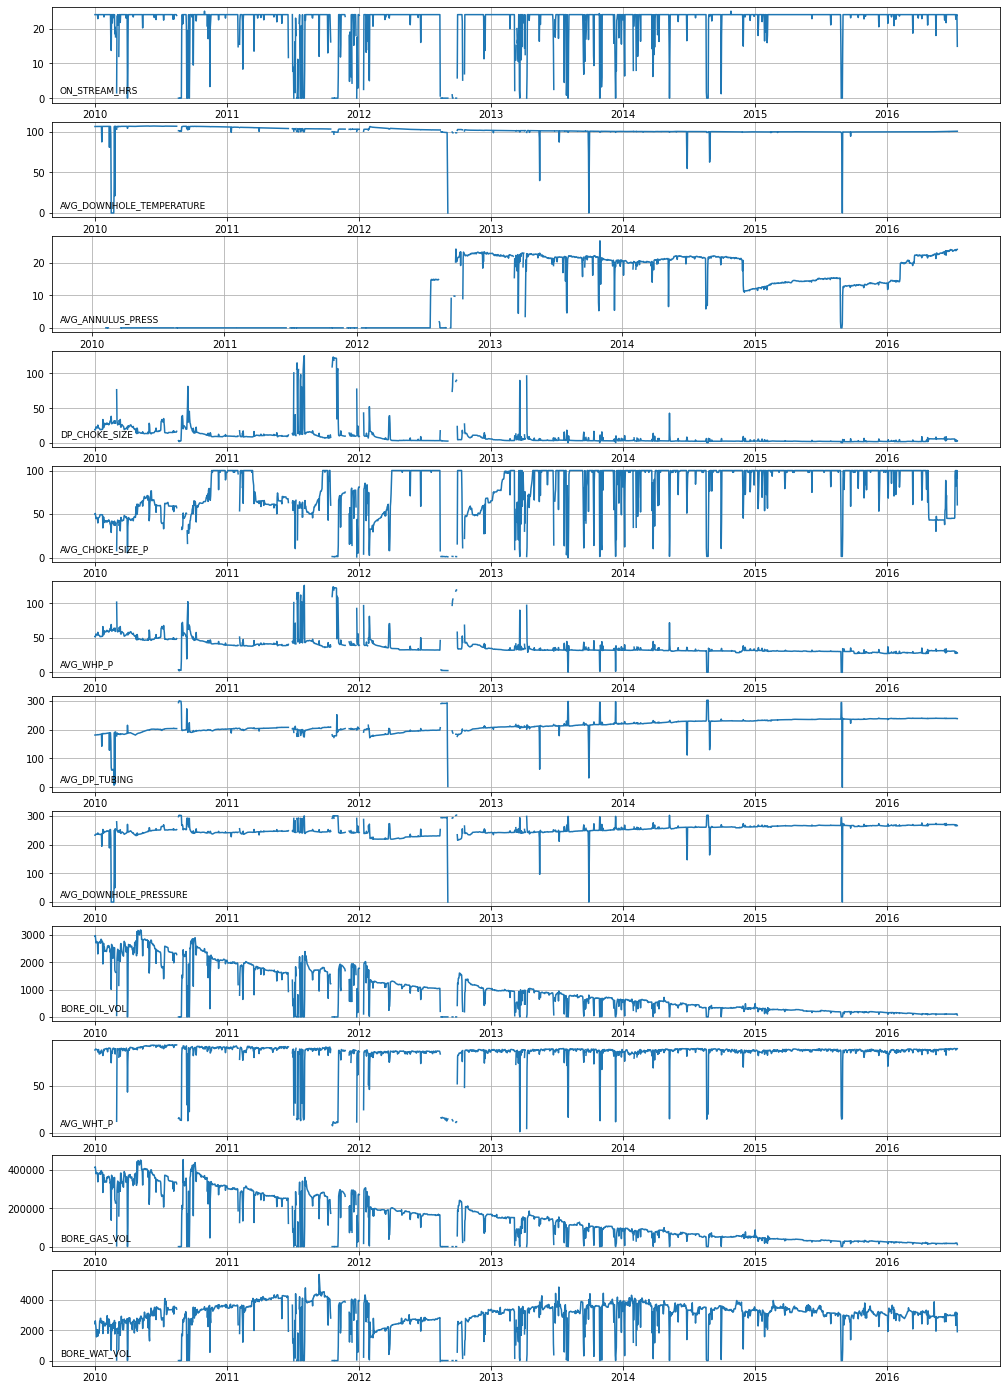

In [17]:
# Data visulaization and disribution plots for well F-14
data = ['ON_STREAM_HRS', 
       'AVG_DOWNHOLE_TEMPERATURE',  'AVG_ANNULUS_PRESS',
        'DP_CHOKE_SIZE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE',   'BORE_OIL_VOL',
       'AVG_WHT_P','BORE_GAS_VOL', 'BORE_WAT_VOL']

# Creating figure with two rows and one column
fig, axs = plt.subplots(nrows=len(data), figsize=(17, 25))

axs = axs.ravel()

for id, column in enumerate(data):

    axs[id].plot(F_14[column])
    axs[id].grid(True)
    axs[id].legend([column], loc='lower left', fontsize=9, handlelength=0, handletextpad=0, frameon=False)
    
plt.show()

In [18]:
F_14["2010-01-01":"2010-01-31"]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2010-01-01,24.00000,232.949281,106.155091,181.268344,NaN,50.150825,51.680937,87.924969,18.711748,2956.17,414039.25,2433.18,24.00000,7012.816528,24.00000,7798.998123
2010-01-02,24.00000,232.889006,106.164275,181.546177,NaN,50.694654,51.342829,88.171331,18.365474,2973.26,416049.71,2626.33,24.00000,6667.445525,24.00000,8190.277863
2010-01-03,24.00000,235.012014,106.152751,181.589545,NaN,47.665676,53.422470,89.037967,20.642776,2829.96,396691.77,2352.40,24.00000,6536.694908,24.00000,8222.391693
2010-01-04,24.00000,237.129106,106.123734,181.546294,NaN,44.706230,55.582813,88.886070,22.976570,2703.20,379733.19,2134.98,24.00000,6401.988114,24.00000,8259.174011
2010-01-05,24.00000,236.425679,106.131018,181.768477,NaN,45.743761,54.657202,88.613113,21.957776,2745.86,385609.86,1564.42,24.00000,6442.839233,24.00000,8287.967224
2010-01-06,24.00000,236.245848,106.140167,181.930405,NaN,46.053981,54.315443,88.419576,21.613907,2755.53,386478.04,1598.47,24.00000,6476.063873,24.00000,8301.062073
2010-01-07,24.00000,236.649735,106.140492,182.085397,NaN,44.740102,54.564338,88.082163,21.910214,2724.82,382552.45,2041.07,24.00000,6354.699707,24.00000,8125.836334
2010-01-08,24.00000,236.636559,106.145114,182.247805,NaN,44.805229,54.388754,88.157606,21.766918,2723.08,382201.62,1667.54,24.00000,6531.044938,24.00000,8097.717911
2010-01-09,22.83333,240.821462,106.110204,182.822060,0.0,39.728795,57.999402,85.779205,25.454394,2301.79,337751.40,1609.05,17.16667,4223.000000,17.50000,5773.000000


In [19]:
# calculate the monthly statistics (Oil/Gas/Water in standard cubic meter, Sm3) for the first and last year
F_14.groupby(by =[F_14.index.year, F_14.index.month]).sum().iloc[np.r_[0:12, 72:79]]

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
DATEPRD DATEPRD                                         
2010    1            742.16666            7359.298892   
        2            610.17500            4268.913156   
        3            654.10832            7067.423380   
        4            679.80833            7249.091313   
        5            740.16667            7486.388005   
        6            717.75000            7515.457905   
        7            742.41667            7919.244385   
        8            425.10000            7291.230696   
        9            566.14999            7747.961360   
        10           743.16666            7538.517621   
        11           683.41667            7231.889495   
        12           741.50000            7510.070978   
2016    1            736.33332            8266.110391   
        2            695.58333            7735.910242   
        3            737.66666            8294.249853   
        4            715.83333            8044.267420   
        5            738.00000            8394.185017   
        6            716.08333            8094.828627   
        7            301.22500            3485.752814   

                 AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
DATEPRD DATEPRD                                                               
2010    1                     3272.771285    5658.070009           0.000000   
        2                     1819.756110    3632.697938           0.000000   
        3                     3078.657591    5358.768341           0.000000   
        4                     3188.174678    5613.804472           0.000000   
        5                     3305.831598    6003.994642           0.000000   
        6                     3201.565882    6035.358303           0.000000   
        7                     3303.118122    6267.973706           0.000000   
        8                     2822.525604    6312.454059           0.000000   
        9                     3176.322659    5997.237662           0.000000   
        10                    3293.519413    6088.288748           0.000000   
        11                    3179.931609    5941.987344           0.000000   
        12                    3278.976863    6239.731685           0.000000   
2016    1                     3086.255668    7379.183728         437.734745   
        2                     2886.835641    6910.086365         547.460574   
        3                     3088.385928    7417.064865         652.043697   
        4                     2987.839929    7170.473714         664.455585   
        5                     3092.850412    7417.306496         697.935404   
        6                     3001.589422    7168.261514         703.056354   
        7                     1303.685602    3102.576181         309.724293   

                 AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
DATEPRD DATEPRD                                                              
2010    1             1414.875920  1701.228883  2695.527917     688.257111   
        2             1082.558656  1647.627111  2369.841980     781.126047   
        3             1217.062491  1708.655039  2474.935546     758.889745   
        4             1365.186401  1635.286841  2624.373697     635.169636   
        5             2008.768248  1482.393363  2836.065926     444.090998   
        6             1879.377504  1480.099602  2778.410368     479.850602   
        7             1673.690939  1651.270678  2852.023210     617.548307   
        8              975.064569   978.776636  1801.040895     379.833986   
        9             1196.215241  1750.723698  2453.499270     832.799402   
        10            1891.369448  1450.228873  2798.190256     442.779955   
        11            2468.517596  1289.902151  2695.157309     314.494917   
        12            3052.134374  1270.339293  2797.137629     288.522200   
2016    1             2941.696672   886.926663  2656.543551      65

In [20]:
# Units conversion
F_14["AVG_DOWNHOLE_PRESSURE"] = F_14["AVG_DOWNHOLE_PRESSURE"] * 14.5037738
F_14["AVG_WHP_P"]  = F_14["AVG_WHP_P"] * 14.5037738
F_14['AVG_DP_TUBING'] = F_14["AVG_DP_TUBING"] * 14.5037738
F_14["DP_CHOKE_SIZE"] = F_14["DP_CHOKE_SIZE"] * 14.5037738
F_14['AVG_ANNULUS_PRESS'] = F_14['AVG_ANNULUS_PRESS'] * 14.5037738
F_14["AVG_DOWNHOLE_TEMPERATURE"] = (F_14["AVG_DOWNHOLE_TEMPERATURE"] * (9/5)) + 32
F_14["AVG_WHT_P"] = (F_14["AVG_WHT_P"] * (9/5)) + 32
F_14["BORE_OIL_VOL"]  = F_14["BORE_OIL_VOL"] * 6.2898106
F_14["BORE_WAT_VOL"] = F_14["BORE_WAT_VOL"]  * 6.2898106
F_14["BORE_GAS_VOL"]  = F_14["BORE_GAS_VOL"] * 35.31466672148859
F_14["F_4_BORE_WI_VOL"] = F_14["F_4_BORE_WI_VOL"] * 6.2898106
F_14["F_5_BORE_WI_VOL"] =  F_14["F_5_BORE_WI_VOL"] * 6.2898106

* References for units conversion: [Rigzone](https://www.rigzone.com/calculator/default.asp#calc)/ [DrillingFormulas](https://www.drillingformulas.com/temperature-conversion-formulas/)/ [PETROLEUM OFFICE](https://petroleumoffice.com/unitconverter/volume-flow-rate/)

In [21]:
F_14

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2010-01-01,24.00000,3378.643673,223.079164,2629.075052,NaN,50.150825,749.568621,190.264943,271.390953,18593.749401,1.462166e+07,15304.241356,24.00000,44109.287732,24.0,49054.221066
2010-01-02,24.00000,3377.769461,223.095696,2633.104681,NaN,50.694654,744.664780,190.708397,266.368677,18701.242265,1.469266e+07,16519.118273,24.00000,41936.969541,24.0,51515.296516
2010-01-03,24.00000,3408.561097,223.074953,2633.733679,NaN,47.665676,774.827418,192.268341,299.398157,17799.912406,1.400904e+07,14796.150455,24.00000,41114.572918,24.0,51717.286427
2010-01-04,24.00000,3439.266918,223.022721,2633.106376,NaN,44.706230,806.160543,191.994925,333.246980,17002.616014,1.341015e+07,13428.619835,24.00000,40267.292699,24.0,51948.640243
2010-01-05,24.00000,3429.064568,223.035833,2636.328873,NaN,45.743761,792.735696,191.503603,318.470614,17270.939334,1.361768e+07,9839.905499,24.00000,40524.238503,24.0,52129.744099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-09,22.66666,3898.799525,212.531820,3467.579160,342.962410,82.190685,431.220365,190.155302,59.673459,642.126764,5.890942e+05,14631.609010,20.16666,45354.713837,NaN,NaN
2016-07-10,24.00000,3856.881668,212.609186,3457.675987,347.801251,100.000000,399.205680,192.476668,28.419888,713.138726,6.622602e+05,20036.002972,24.00000,54538.220132,NaN,NaN
2016-07-11,23.66667,3883.654059,212.577722,3461.161276,347.148459,91.162324,422.492783,192.334594,49.425500,684.582986,6.349323e+05,19223.485239,22.00000,48976.167901,NaN,NaN


In [22]:
# calculate te number of days that we are suppose to have
from datetime import date
f_date = date(2010, 1, 1)
l_date = date(2016, 7, 13)
delta = l_date - f_date
print(delta.days + 1) # no missing days

2386


In [23]:
# train/test split ratio-> 80:20 
# the data cannot be split randomly into training and testing sets becasue the temporal order of a time-series is important
split_point = int(0.8 * len(F_14)) # training and validation sets
train, test = F_14[:split_point], F_14[split_point:] # train -> model training and hyperparameter optimization/ test-> performance evaluation
train.shape, test.shape # train -> 2010/1/1 - 2015/3/23 test 2015/3/24 -2016/7/13

((1908, 16), (478, 16))

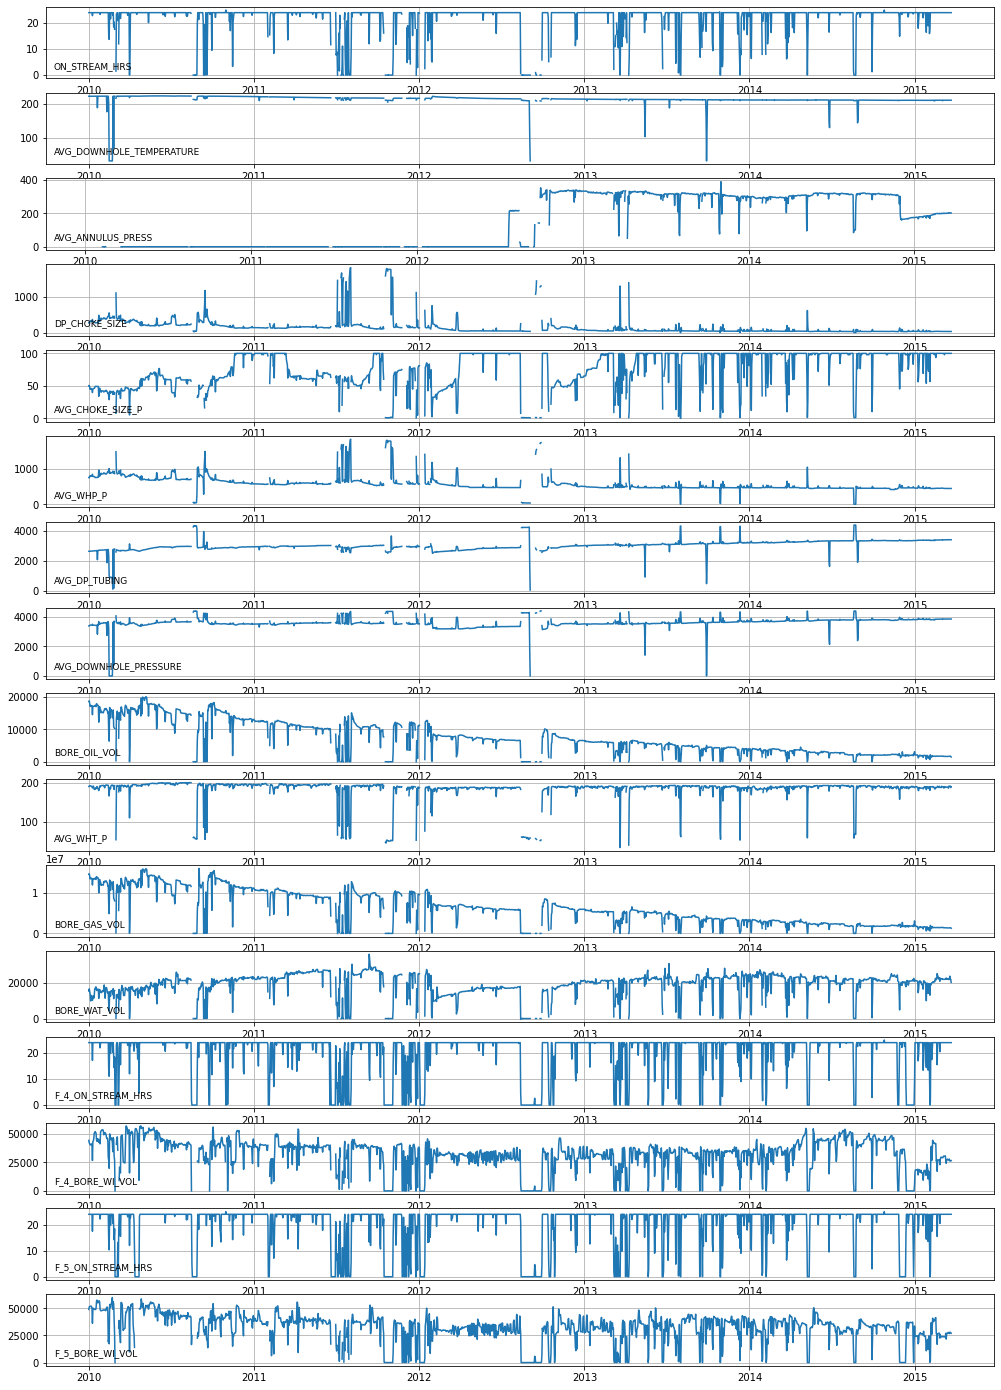

In [24]:
# Data visulaization and disribution plots for well F-14 after including the injectors
data = ['ON_STREAM_HRS', 
       'AVG_DOWNHOLE_TEMPERATURE',  'AVG_ANNULUS_PRESS',
        'DP_CHOKE_SIZE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_DP_TUBING','AVG_DOWNHOLE_PRESSURE',   'BORE_OIL_VOL',
       'AVG_WHT_P','BORE_GAS_VOL', 'BORE_WAT_VOL', 'F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL',
       'F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL']

# Creating figure with two rows and one column
fig, axs = plt.subplots(nrows=len(data), figsize=(17, 25))

axs = axs.ravel()

for id, column in enumerate(data):

    axs[id].plot(train[column])
    axs[id].grid(True)
    axs[id].legend([column], loc='lower left', fontsize=9, handlelength=0, handletextpad=0, frameon=False)
    
plt.show()

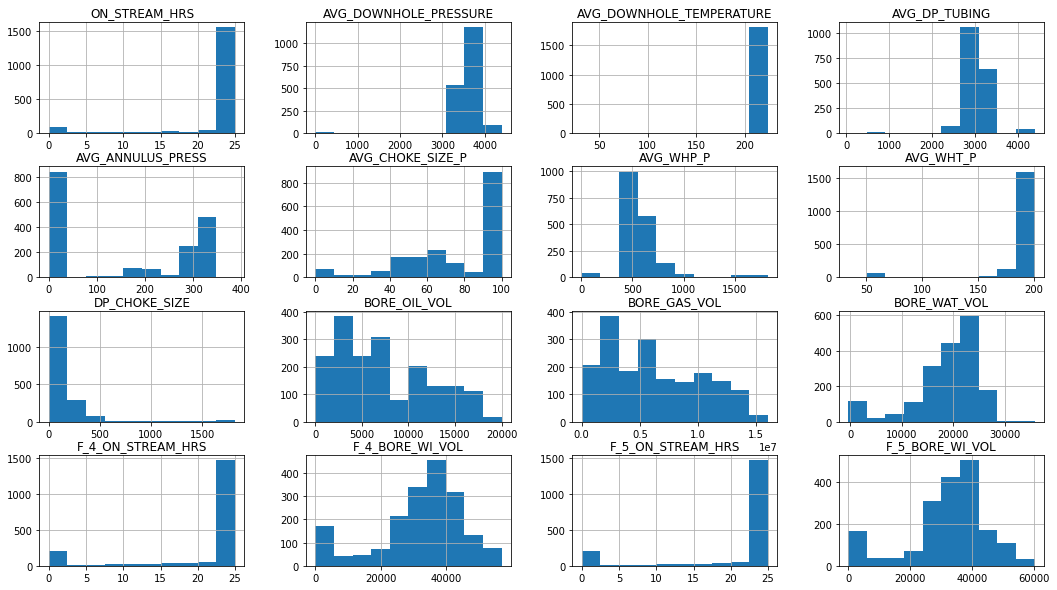

In [25]:
# plotting the distribution of all variables
train.hist(figsize=(18,10))
plt.show()

In [26]:
# check data range constrain
train.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1828.000000,1828.000000,1828.000000,1828.000000,1764.000000,1802.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1908.000000,1862.000000,1908.000000,1855.000000
mean,21.841193,3583.535031,214.625146,3019.578691,150.044131,75.926647,572.536377,183.015493,152.270115,7261.418839,6.145965e+06,18826.746730,20.318801,31966.662247,20.354637,32030.073489
std,6.049317,373.637560,16.012126,354.479368,149.043042,27.848957,219.312316,29.148980,239.001866,5028.465623,4.125306e+06,6465.248079,7.832144,13563.536469,7.831526,13098.199268
min,0.000000,0.000000,32.000000,39.914966,0.000000,0.000000,4.962176,33.784862,0.914898,0.000000,0.000000e+00,-372.293889,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3507.717504,212.045240,2869.027307,0.000000,58.209641,466.837358,186.971179,42.193006,2982.109277,2.482519e+06,16688.534322,23.660412,27193.841709,23.976393,27747.420619
50%,24.000000,3573.179417,214.761736,2985.324683,166.504338,87.925927,502.575163,189.891963,76.842538,6274.400564,5.642409e+06,20839.337582,24.000000,34665.079944,24.000000,34828.075900
75%,24.000000,3730.074164,219.996743,3208.012793,312.228731,100.000000,608.024884,192.529627,164.022008,11186.679745,9.664422e+06,22753.562815,24.000000,40332.545356,24.000000,39781.794083
max,25.000000,4395.827404,224.190920,4381.731622,386.993210,100.000000,1823.393702,200.317251,1823.393702,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [27]:
# check data type constrait
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1908 entries, 2010-01-01 to 2015-03-23
Freq: D
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             1828 non-null   float64
 1   AVG_DOWNHOLE_PRESSURE     1828 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  1828 non-null   float64
 3   AVG_DP_TUBING             1828 non-null   float64
 4   AVG_ANNULUS_PRESS         1764 non-null   float64
 5   AVG_CHOKE_SIZE_P          1802 non-null   float64
 6   AVG_WHP_P                 1828 non-null   float64
 7   AVG_WHT_P                 1828 non-null   float64
 8   DP_CHOKE_SIZE             1828 non-null   float64
 9   BORE_OIL_VOL              1828 non-null   float64
 10  BORE_GAS_VOL              1828 non-null   float64
 11  BORE_WAT_VOL              1828 non-null   float64
 12  F_4_ON_STREAM_HRS         1908 non-null   float64
 13  F_4_BORE_WI_VOL           1862 non-nu

In [28]:
# check for missing values
train.isnull().sum()

ON_STREAM_HRS                80
AVG_DOWNHOLE_PRESSURE        80
AVG_DOWNHOLE_TEMPERATURE     80
AVG_DP_TUBING                80
AVG_ANNULUS_PRESS           144
AVG_CHOKE_SIZE_P            106
AVG_WHP_P                    80
AVG_WHT_P                    80
DP_CHOKE_SIZE                80
BORE_OIL_VOL                 80
BORE_GAS_VOL                 80
BORE_WAT_VOL                 80
F_4_ON_STREAM_HRS             0
F_4_BORE_WI_VOL              46
F_5_ON_STREAM_HRS             0
F_5_BORE_WI_VOL              53
dtype: int64

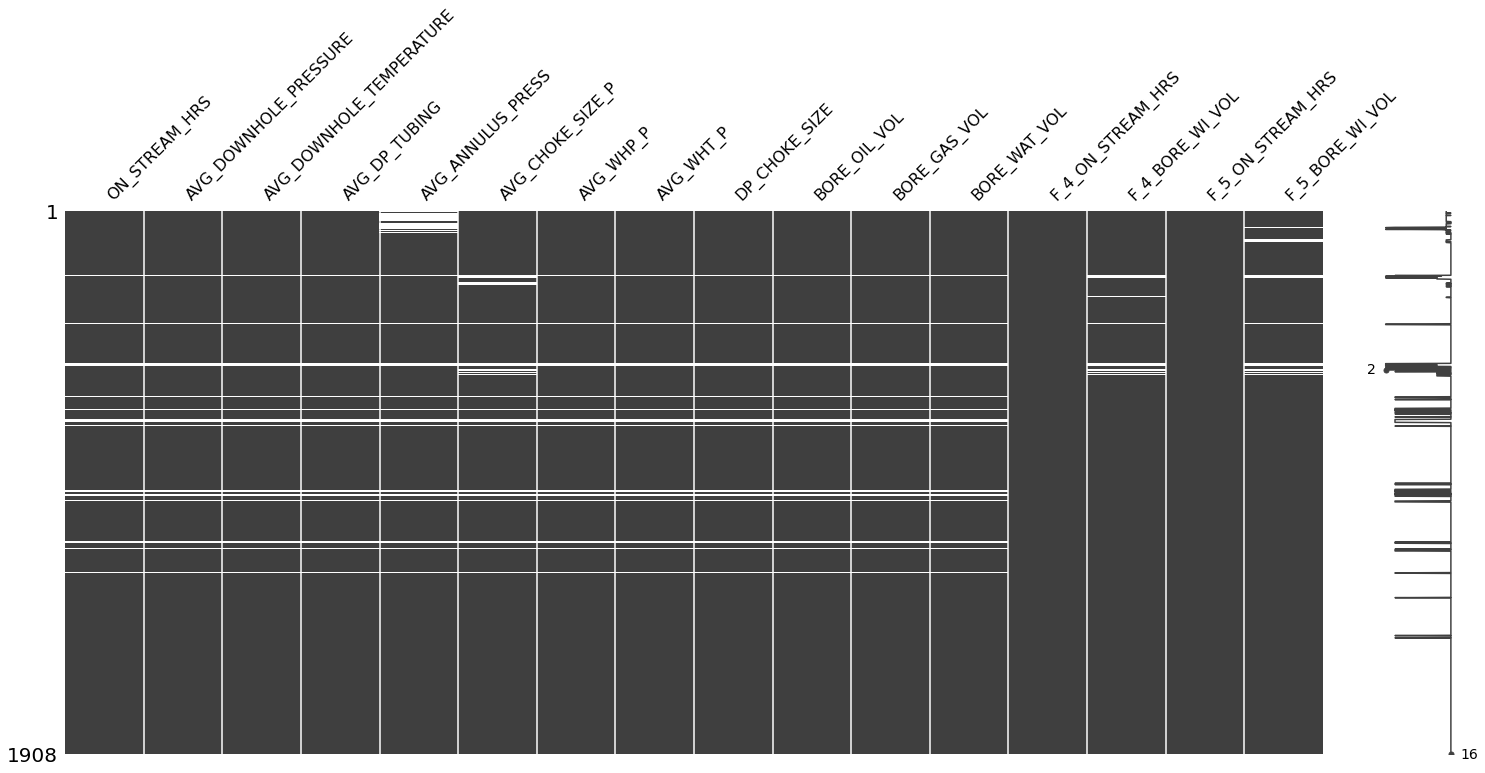

In [29]:
msno.matrix(train)

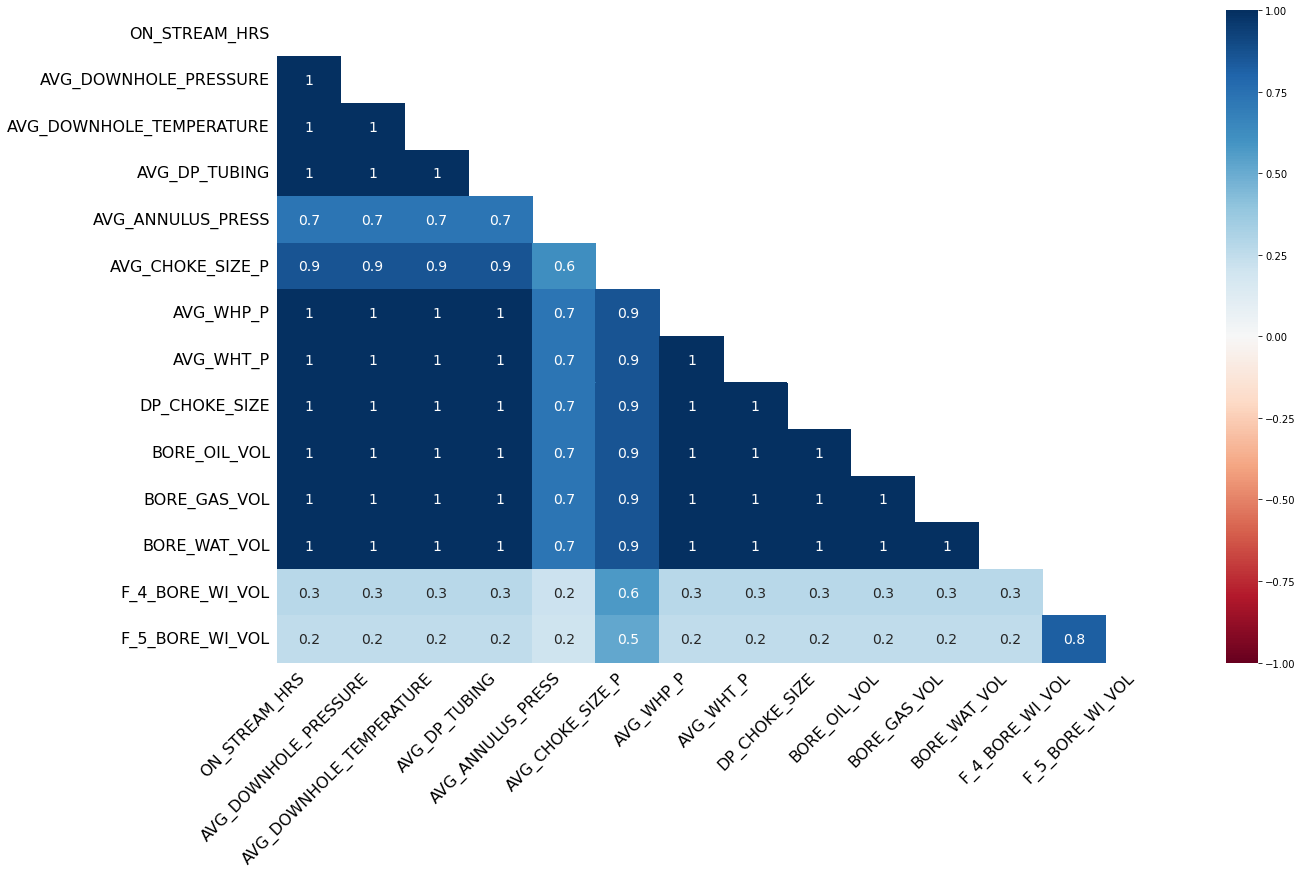

In [30]:
msno.heatmap(train)

In [31]:
# duplicated records
train.loc[train.duplicated()]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2010-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2010-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2010-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2010-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2011-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2014-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2014-08-22,0.0,4386.87408,210.091874,4381.731622,99.511117,1.28336,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
F_14.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL',
       'F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL'],
      dtype='object')

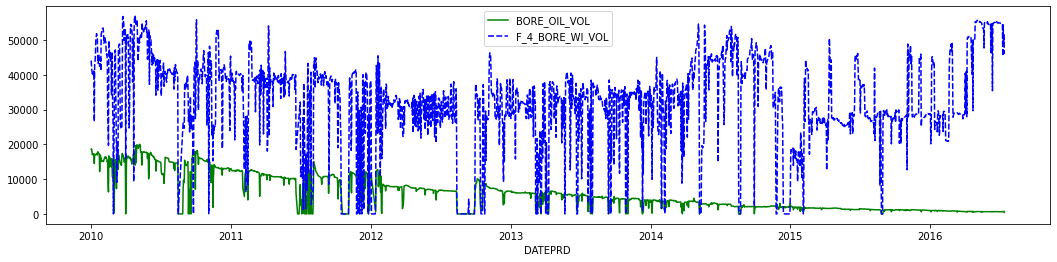

In [33]:
plt.figure(figsize=(18,4))
sns.lineplot(data=F_14[["BORE_OIL_VOL",'F_4_BORE_WI_VOL']], palette=['g', 'b'])

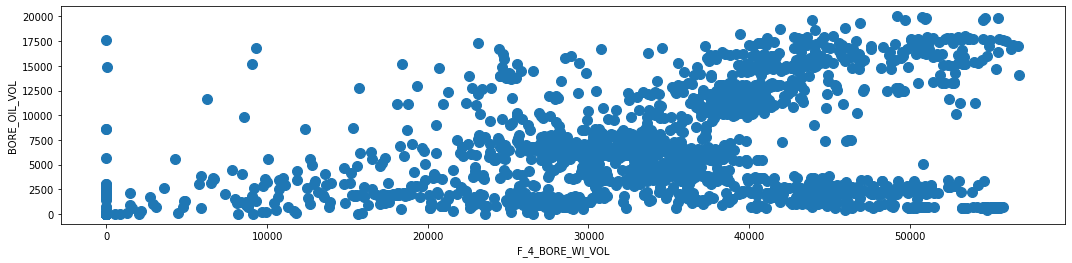

In [34]:
F_14.plot.scatter(x = 'F_4_BORE_WI_VOL', y = "BORE_OIL_VOL", s = 100, figsize=(18,4))

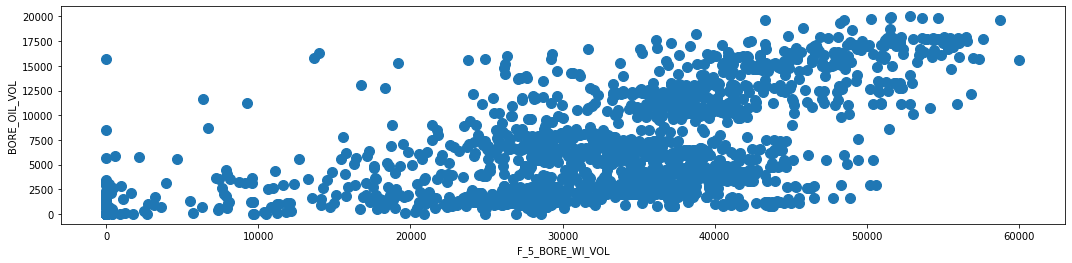

In [35]:
F_14.plot.scatter(x = 'F_5_BORE_WI_VOL', y = "BORE_OIL_VOL", s = 100, figsize=(18,4))

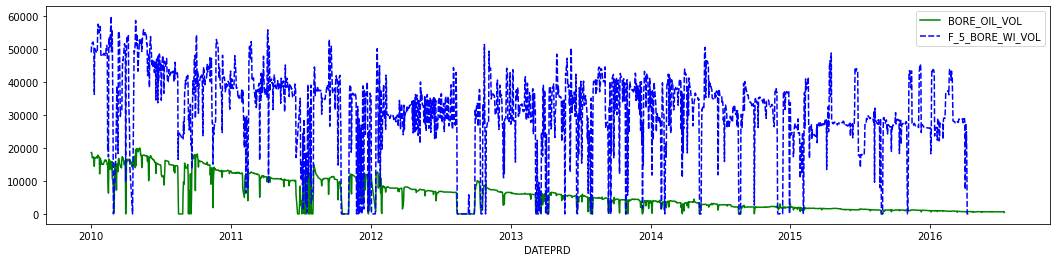

In [36]:
plt.figure(figsize=(18,4))
sns.lineplot(data=F_14[["BORE_OIL_VOL",'F_5_BORE_WI_VOL']], palette=['g', 'b'])

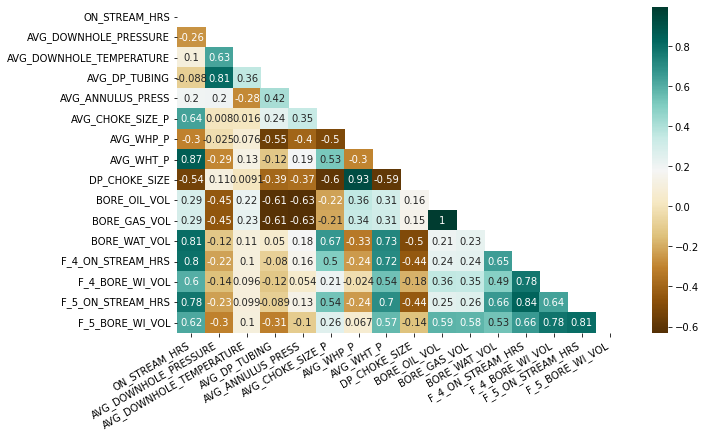

In [37]:
mask = np.triu(np.ones_like(F_14.corr(method='spearman')))
plt.figure(figsize=(10,6))
correlation_mat = F_14.corr()
ax = sns.heatmap(correlation_mat, annot = True, cmap='BrBG', mask=mask)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);
plt.show()

In [38]:
F_14.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'F_4_ON_STREAM_HRS', 'F_4_BORE_WI_VOL',
       'F_5_ON_STREAM_HRS', 'F_5_BORE_WI_VOL'],
      dtype='object')

In [39]:
# create a copy of the df and fill the null values with zero as the cross-correlation function doesn't work with NaN
f_14 = F_14.copy()
f_14 = f_14.fillna(0)

In [40]:
#calculate cross correlation
sm.tsa.stattools.ccf(f_14['F_4_BORE_WI_VOL'], f_14['BORE_OIL_VOL'], adjusted=False)

array([0.41141176, 0.34961629, 0.30227447, ..., 0.00377568, 0.00254975,
       0.00106263])

In [41]:
#calculate cross correlation
sm.tsa.stattools.ccf(f_14['F_5_BORE_WI_VOL'], f_14['BORE_OIL_VOL'], adjusted=False)

array([ 0.59899389,  0.5431903 ,  0.50408909, ..., -0.00633565,
       -0.00431853, -0.00215025])

In [43]:
train.to_csv("df.csv")